In [1]:
import numpy as np
import random, operator
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [3]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness


In [4]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

In [5]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [6]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [7]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
#     print(df)
    return selectionResults

In [8]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [9]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

In [10]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [11]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [12]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [13]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [51]:
import re
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
 
    print("Best route: ",bestRoute)
    return bestRoute
    


In [15]:
def ploting(bestRoute):
    br=[]
    for i in bestRoute:
        j=str(i)
        k=(tuple(map(int,(re.sub(r"\((.*?)\)", r"\1", j).split(',')))))
        br.append(k)
    
    start = [start[0] for start in br]
    end = [end[1] for end in br]
 
    plt.plot(start,end)
    for i in br:
        plt.scatter(i[0],i[1])  

List of City Coordinates : [(56,182), (159,68), (2,176), (4,88), (13,93), (168,198), (171,192), (124,34), (194,184), (91,29), (55,112), (159,161), (171,1), (171,185), (116,35), (108,43), (114,31), (78,45), (1,91), (192,66), (160,100), (148,55), (35,79), (170,78), (4,95)]


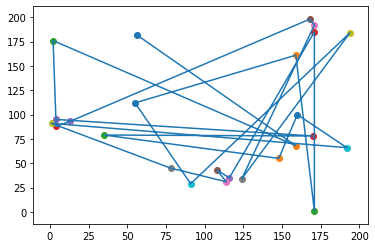

In [16]:
cityList = []
for i in range(0,25):
    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))
print("List of City Coordinates :",cityList)
ploting(cityList)

Initial distance: 2103.855311468689
Final distance: 845.2283735174454


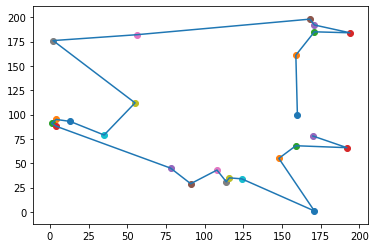

In [17]:
ploting(geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500))

In [18]:
def differencePlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

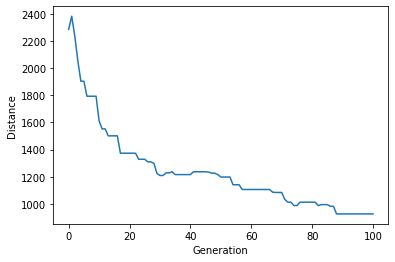

In [19]:
differencePlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=100)

In [20]:
import folium
def mappin(df,locationlist):
    mapp = folium.Map(location=[])
    for point in range(0,20):
        folium.Marker(locationlist[point], popup=df['Country'][point]).add_to(mapp)
    folium.PolyLine(locationlist, color="red", weight=2.5, opacity=1).add_to(mapp)
    return mapp

In [21]:
df = pd.read_csv('dataset.csv')
df.head(10)

,Country,latitude,longitude
0,Andorra,42.546245,1.601554
1,United Arab Emirates,23.424076,53.847818
2,Afghanistan,33.939110,67.709953
3,Antigua and Barbuda,17.060816,-61.796428
4,Anguilla,18.220554,-63.068615
5,Albania,41.153332,20.168331
6,Armenia,40.069099,45.038189
7,Netherlands Antilles,12.226079,-69.060087
8,Angola,-11.202692,17.873887
9,Antarctica,-75.250973,-0.071389


In [22]:
print("Random routes would be")

Random routes would be


In [23]:
#click on the blue markers to read Country name
locations = df[['latitude', 'longitude']]
locationlist = locations.values.tolist()
locationlist = locationlist[:20]
mappin(df,locationlist)

In [24]:
empttylist=[]
new = df.iloc[:20,[1,2]]
for i in new.values:
    empttylist.append(City(i[0],i[1]))
# print(empttylist)
bestroute = geneticAlgorithm(population=empttylist, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)


Initial distance: 1404.1508360703626
Final distance: 746.105270599987


In [25]:
br=[]
for i in bestroute:
    j=str(i)
    k=(tuple(map(float,(re.sub(r"\((.*?)\)", r"\1", j).split(',')))))
    br.append(k)
mappin(df,br)

In [26]:
df2 = pd.read_csv('belgaum.csv')
df2.head(10)

,Places,latitude,longitude
0,Angol,15.823429,74.503312
1,Belgaum,16.333333,74.750000
2,Belgaum Bus Stand,15.862862,74.525638
3,Belgaum Camp,15.868676,74.506198
4,Belgaum City,16.159162,74.888736
5,Belgaum Fort,15.858170,74.525565
6,Nehru Nagar,15.883319,74.519962


In [27]:
locations = df2[['latitude', 'longitude']]
locationlist = locations.values.tolist()
locationlist = locationlist[:7]
import folium
def mapping(df,locationlist,a):
    mapp = folium.Map(location=[15.862862,74.525638],zoom_start=13)
    for point in range(0,a):
        folium.Marker(locationlist[point], popup=df['Places'][point]).add_to(mapp)
    folium.PolyLine(locationlist, color="red", weight=2.5, opacity=1).add_to(mapp)
    return mapp
mapping(df2,locationlist,a=7)

In [30]:
empttylist=[]
new = df2.iloc[:7,[1,2]]
for i in new.values:
    empttylist.append(City(i[0],i[1]))
print(empttylist)
bestroute = geneticAlgorithm(population=empttylist, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)


[(15.823429,74.503312), (16.333333,74.75), (15.862862,74.525638), (15.868676,74.506198), (16.159162,74.888736), (15.858170000000001,74.525565), (15.883319,74.51996199999999)]
Initial distance: 1.315204073512555
Final distance: 1.3081097188285464


In [29]:
br=[]
for i in bestroute:
    j=str(i)
    k=(tuple(map(float,(re.sub(r"\((.*?)\)", r"\1", j).split(',')))))
    br.append(k)
mapping(df2,br,a=7)

In [32]:
df3 = pd.read_csv('in.csv')
df3.head(10)

,city,lat,lng,country,iso2,admin,capital,population,population_proper
0,Mumbai,18.987807,72.836447,India,IN,Mahārāshtra,admin,18978000.0,12691836.0
1,Delhi,28.651952,77.231495,India,IN,Delhi,admin,15926000.0,7633213.0
2,Kolkata,22.562627,88.363044,India,IN,West Bengal,admin,14787000.0,4631392.0
3,Chennai,13.084622,80.248357,India,IN,Tamil Nādu,admin,7163000.0,4328063.0
4,Bengalūru,12.977063,77.587106,India,IN,Karnātaka,admin,6787000.0,5104047.0
5,Hyderabad,17.384052,78.456355,India,IN,Andhra Pradesh,admin,6376000.0,3597816.0
6,Ahmadābād,23.025793,72.587265,India,IN,Gujarāt,minor,5375000.0,3719710.0
7,Hāora,22.576882,88.318566,India,IN,West Bengal,NaN,4841638.0,1027672.0
8,Pune,18.513271,73.849852,India,IN,Mahārāshtra,NaN,4672000.0,2935744.0
9,Sūrat,21.195944,72.830232,India,IN,Gujarāt,NaN,3842000.0,2894504.0


In [36]:
locations = df3[['lat', 'lng']]
locationlist = locations.values.tolist()
locationlist = locationlist[:10]
import folium
def mapping(df,locationlist,a):
    mapp = folium.Map(location=[18.987807,72.836447],zoom_start=13)
    for point in range(0,a):
        folium.Marker(locationlist[point], popup=df['city'][point]).add_to(mapp)
    folium.PolyLine(locationlist, color="red", weight=2.5, opacity=1).add_to(mapp)
    return mapp
mapping(df2,locationlist,a=10)

In [37]:
empttylist=[]
new = df3.iloc[:10,[1,2]]
for i in new.values:
    empttylist.append(City(i[0],i[1]))
print(empttylist)
bestroute = geneticAlgorithm(population=empttylist, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)


[(18.987807,72.83644699999999), (28.651952,77.231495), (22.562627,88.36304399999999), (13.084622,80.248357), (12.977063000000001,77.587106), (17.384052,78.456355), (23.025793,72.587265), (22.576882,88.318566), (18.513271,73.849852), (21.195944,72.830232)]
Initial distance: 65.58437162659726
Final distance: 49.532938607936124


In [38]:
br=[]
for i in bestroute:
    j=str(i)
    k=(tuple(map(float,(re.sub(r"\((.*?)\)", r"\1", j).split(',')))))
    br.append(k)
mapping(df3,br,a=10)

In [41]:
df4 = pd.read_csv('karnataka.csv')
df4.head(10)

,city,lat,lng,country,iso2,admin,capital,population,population_proper
0,Bengalūru,12.977063,77.587106,India,IN,Karnātaka,admin,6787000,5104047
1,Hubli,15.349955,75.138619,India,IN,Karnātaka,NaN,890000,792804
2,Mysore,12.292664,76.638543,India,IN,Karnātaka,NaN,887000,868313
3,Mangalore,12.865371,74.842432,India,IN,Karnātaka,NaN,776632,417387
4,Shimoga,13.932424,75.572555,India,IN,Karnātaka,NaN,654055,319550
5,Belgaum,15.862643,74.508534,India,IN,Karnātaka,NaN,608756,610189
6,Davangere,14.469237,75.923750,India,IN,Karnātaka,NaN,503564,435125
7,Gulbarga,17.335827,76.837570,India,IN,Karnātaka,NaN,483615,481478
8,Bellary,15.142049,76.923980,India,IN,Karnātaka,NaN,445388,336681
9,Tumkūr,13.341358,77.102203,India,IN,Karnātaka,NaN,399606,307359


In [47]:
locations = df4[['lat', 'lng']]
locationlist = locations.values.tolist()
locationlist = locationlist[:16]
import folium
def mapping(df,locationlist,a):
    mapp = folium.Map(location=[15.862643,74.508534],zoom_start=13)
    for point in range(0,a):
        folium.Marker(locationlist[point], popup=df['city'][point]).add_to(mapp)
    folium.PolyLine(locationlist, color="red", weight=2.5, opacity=1).add_to(mapp)
    return mapp
mapping(df4,locationlist,a=16)

In [48]:
empttylist=[]
new = df3.iloc[:16,[1,2]]
for i in new.values:
    empttylist.append(City(i[0],i[1]))
print(empttylist)
bestroute = geneticAlgorithm(population=empttylist, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)


[(12.977063000000001,77.587106), (15.349955,75.13861899999999), (12.292664,76.638543), (12.865371000000001,74.84243199999999), (13.932424,75.57255500000001), (15.862642999999998,74.508534), (14.469237,75.92375), (17.335827,76.83757), (15.142048999999998,76.92398), (13.341358,77.102203), (17.913308999999998,77.530105), (15.269537,76.387103), (12.545602,76.895078), (16.827714999999998,75.718988), (16.205459,77.35566999999999), (13.137679,78.129989)]
Initial distance: 29.444813656547076
Final distance: 17.704789985453942


In [49]:
br=[]
for i in bestroute:
    j=str(i)
    k=(tuple(map(float,(re.sub(r"\((.*?)\)", r"\1", j).split(',')))))
    br.append(k)
mapping(df3,br,a=16)